## Load data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from factor_analyzer import FactorAnalyzer
sns.set(context='talk', style='white')

project_home = os.path.join('/','Users','catcamacho','Library','CloudStorage','Box-Box','CCP','HBN_study')
#current_dir = os.path.abspath(os.path.curdir)
#project_home = os.path.dirname(current_dir)
socdata = pd.read_csv(os.path.join(project_home,'phenotypic_data','clinical_data_preprocimpITEMS_SRonly_quallabels20211115.csv'), index_col=0)
socdata.describe()

,scaredsr_hardtobreathe,scaredsr_schoolheadaches,scaredsr_notlikestrangers,scaredsr_notlikesleepaway,scaredsr_worrybeingliked,scaredsr_passingout,scaredsr_nervous,scaredsr_followparent,scaredsr_looknervous,scaredsr_nervousstrangers,...,mfqsr_selfbad,mfqsr_selfugly,mfqsr_worryaches,mfqsr_lonely,mfqsr_nolove,mfqsr_notenjoyschool,mfqsr_notgoodenough,mfqsr_doeswrong,mfqsr_poorsleep,mfqsr_moresleep
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,...,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,0.218072,0.380806,0.479070,0.241958,0.300169,0.128555,0.365388,0.389345,0.170738,0.415631,...,0.137007,0.154076,0.214154,0.225631,0.119481,0.260494,0.189613,0.118370,0.302450,0.301150
std,0.323562,0.360523,0.375035,0.347438,0.367730,0.280199,0.359281,0.378888,0.299737,0.377610,...,0.280152,0.296843,0.331646,0.334402,0.267164,0.346250,0.324193,0.259788,0.368493,0.375007
min,0.000000,0.000000,0.000000,-0.025841,0.000000,0.000000,0.000000,0.000000,-0.003937,0.000000,...,-0.045152,-0.076786,0.000000,0.000000,-0.026009,0.000000,-0.034702,-0.047403,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.500000,1.000000,0.500000,0.500000,0.000000,0.500000,0.500000,0.340088,0.500000,...,0.044158,0.115152,0.500000,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.027170,1.000000,1.000000,1.000000,1.000000


## Test suitability for factor analysis
For these tests, if the Barlett test is significant, that means that there are items that covary.  If the KMO is greater than 0.6, that means that there is suitable variance for factor analysis.

In [10]:
# Bartlett's test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(socdata)
print('Bartlett stat =',round(chi_square_value,2),'p-val=', round(p_value,3))

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model=calculate_kmo(socdata)
print('KMO stat =',round(kmo_model,2))

Bartlett stat = 75248.77 p-val= 0.0
KMO stat = 0.97


## Determine how many factors to model

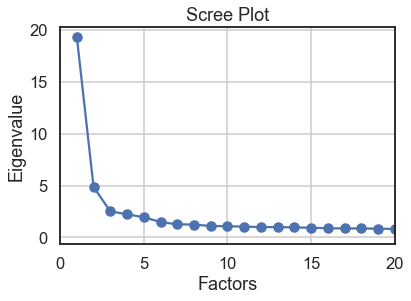

In [33]:
fa = FactorAnalyzer(rotation=None)
fa.fit(socdata)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()

# Create scree plot
plt.scatter(range(1,socdata.shape[1]+1),ev)
plt.plot(range(1,socdata.shape[1]+1),ev)
plt.xlim(0,20)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Perform final factor analysis

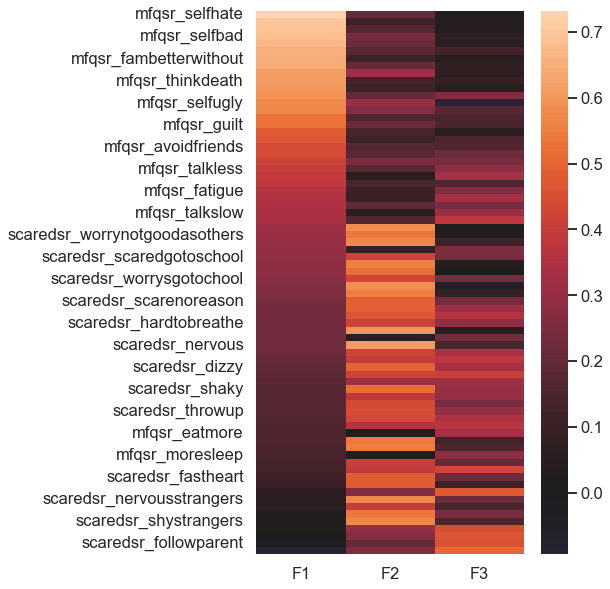

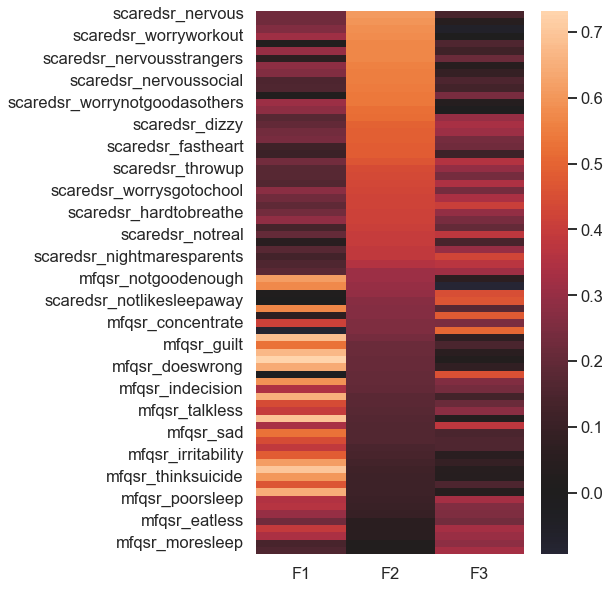

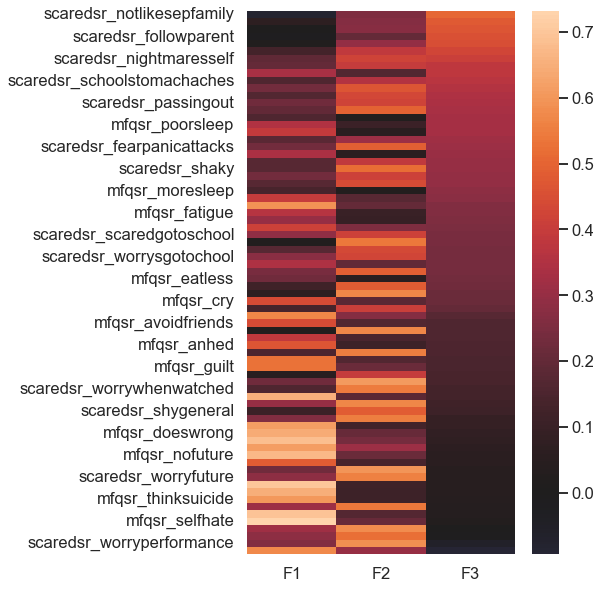

In [38]:
nfact=3
fa = FactorAnalyzer(rotation="varimax", n_factors=nfact)
fa.fit(socdata)

loadings = pd.DataFrame(fa.loadings_, index=socdata.columns, columns=['F{0}'.format(a) for a in range(1,nfact+1)])

loadings = loadings.sort_values('F1',ascending=False)
plt.figure(figsize=(6,10))
sns.heatmap(loadings, center=0)
plt.show()
plt.close()

loadings = loadings.sort_values('F2',ascending=False)
plt.figure(figsize=(6,10))
sns.heatmap(loadings, center=0)
plt.show()
plt.close()

loadings = loadings.sort_values('F3',ascending=False)
plt.figure(figsize=(6,10))
sns.heatmap(loadings, center=0)
plt.show()
plt.close()

In [29]:
factor_variance = pd.DataFrame(fa.get_factor_variance(), index=['SSLoadings','PropVar','CummVar'], 
                               columns=['F{0}'.format(a) for a in range(1,nfact+1)])
factor_variance

,F1,F2,F3
SSLoadings,10.196079,9.901407,4.688828
PropVar,0.137785,0.133803,0.063363
CummVar,0.137785,0.271588,0.334950
